In [1]:
import pandas as pd
from mplsoccer import VerticalPitch, FontManager, Pitch
from statsbombpy import sb
import matplotlib.pyplot as plt
import numpy as np

URL = 'https://github.com/google/fonts/blob/main/ofl/bungeeinline/BungeeInline-Regular.ttf?raw=true'
titulo = FontManager(URL)

In [2]:
copaamerica = sb.matches(competition_id= 223, season_id=282).sort_values(by='match_date')
copaamerica

match_id  match_date      kick_off                   competition season  \
31   3939969  2024-06-21  03:00:00.000  South America - Copa America   2024   
30   3939970  2024-06-22  03:00:00.000  South America - Copa America   2024   
29   3939971  2024-06-23  04:00:00.000  South America - Copa America   2024   
28   3939972  2024-06-23  01:00:00.000  South America - Copa America   2024   
27   3939974  2024-06-24  01:00:00.000  South America - Copa America   2024   
7    3939973  2024-06-24  04:00:00.000  South America - Copa America   2024   
26   3939975  2024-06-25  01:00:00.000  South America - Copa America   2024   
25   3939976  2024-06-25  04:00:00.000  South America - Copa America   2024   
23   3939978  2024-06-26  01:00:00.000  South America - Copa America   2024   
24   3939977  2024-06-26  04:00:00.000  South America - Copa America   2024   
22   3939979  2024-06-27  04:00:00.000  South America - Copa America   2024   
21   3939980  2024-06-27  01:00:00.000  South America - Copa America   2024   
12   3939981  2024-06-28  01:00:00.000  South America - Copa America   2024   
20   3939982  2024-06-28  04:00:00.000  South America - Copa America   2024   
11   3939984  2024-06-29  01:00:00.000  South America - Copa America   2024   
19   3939983  2024-06-29  04:00:00.000  South America - Copa America   2024   
10   3939985  2024-06-30  03:00:00.000  South America - Copa America   2024   
6    3939986  2024-06-30  03:00:00.000  South America - Copa America   2024   
18   3939987  2024-07-01  03:00:00.000  South America - Copa America   2024   
17   3939988  2024-07-01  03:00:00.000  South America - Copa America   2024   
15   3939990  2024-07-02  04:00:00.000  South America - Copa America   2024   
16   3939989  2024-07-02  04:00:00.000  South America - Copa America   2024   
14   3939991  2024-07-03  04:00:00.000  South America - Copa America   2024   
13   3939992  2024-07-03  04:00:00.000  South America - Copa America   2024   
9    3942228  2024-07-05  04:00:00.000  South America - Copa America   2024   
8    3942229  2024-07-06  04:00:00.000  South America - Copa America   2024   
5    3942415  2024-07-07  04:00:00.000  South America - Copa America   2024   
4    3942416  2024-07-07  01:00:00.000  South America - Copa America   2024   
3    3942785  2024-07-10  03:00:00.000  South America - Copa America   2024   
2    3942852  2024-07-11  03:00:00.000  South America - Copa America   2024   
1    3943076  2024-07-14  03:00:00.000  South America - Copa America   2024   
0    3943077  2024-07-15  04:15:00.000  South America - Copa America   2024   

        home_team      away_team  home_score  away_score match_status  ...  \
31      Argentina         Canada           2           0    available  ...   
30           Peru          Chile           0           0    available  ...   
29         Mexico        Jamaica           1           0    available  ...   
28        Ecuador      Venezuela           1           2    available  ...   
27  United States        Bolivia           2           0    available  ...   
7         Uruguay         Panama           3           1    available  ...   
26       Colombia       Paraguay           2           1    available  ...   
25         Brazil     Costa Rica           0           0    available  ...   
23           Peru         Canada           0           1    available  ...   
24          Chile      Argentina           0           1    available  ...   
22      Venezuela         Mexico           1           0    available  ...   
21        Ecuador        Jamaica           3           1    available  ...   
12         Panama  United States           2           1    available  ...   
20        Uruguay        Bolivia           5           0    available  ...   
11       Colombia     Costa Rica           3           0    available  ...   
19       Paraguay         Brazil           1           4    available  ...   
10         Canada          Chile           0           0    available 

Text(0.5, 1.0, 'Mapa de pases de Enzo\nen la Final de la Copa America 2024')

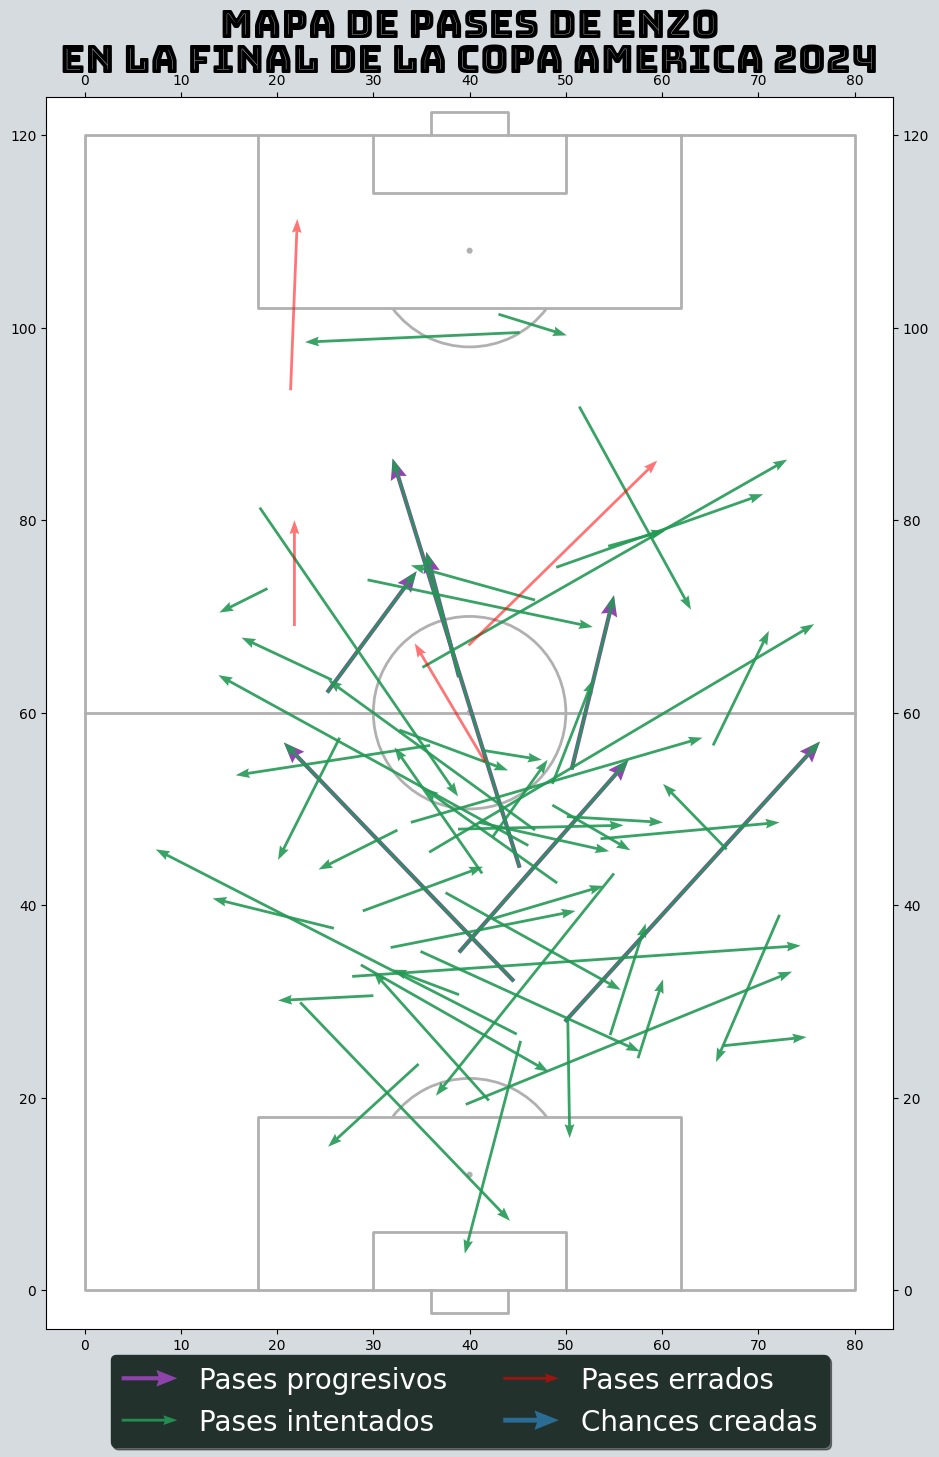

In [20]:
partido = sb.events(match_id=3943077)

partido[['x','y']] = partido['location'].apply(pd.Series)
partido[['endx','endy']] = partido['pass_end_location'].apply(pd.Series)

enzo = partido[partido['player'] == 'Enzo Fernandez' ]
pasesenzo = enzo[enzo['type'] == 'Pass']
pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True][['x','y','endx','endy']]
pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]


#Metodo McKay Jhons (distancia entre puntos para calcular pases progresivos, respecto del centro del arco rival)
pases_correctos = pases_correctos.reset_index(drop=True)

#Distancia al medio del arco desde el inicio del pase
pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))

#Distancia al medio del alco desde el fin del pase
pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))


#Se itera cada x por sobre la longitud de Beginning. Calcula la division del fin sobre el inicio, y si dicho calculo es menor al 0.8, se puede decir que el aumento es del 20%, en cuanto a distancia en la cancha
pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
#Ejemplo de la fila 1: La distancia al arco previo al pase era de 43 metros, y despues de realizar el pase la distancia es de 31 metros, es decir, que me termine acercando al arco mas de un 20%, lo que convierte a dicho pase en un pase progresivo
#Ejemplo de la fila 2: La distancia al arco entre el comienzo del pase y el fin del pase, a penas se acorta en un metro, estando a una distancia de 25 metros, lo que conlleva a ser un pase poco progresivo
#Ejemplo de la fila 3: La distancia entre el inicio del pase y el arco, es menor que la distancia del final del pase y el arco del rival, lo que nos lleva a deducir que fue un pase para atras, poco progresivo

progresivos = pases_correctos[pases_correctos['progressive'] == True ]

pases_correctos['delta_metros'] = pases_correctos['beginning'] - pases_correctos['end']

pases_correctos[['beginning', 'end','progressive', 'delta_metros']]

fig, ax = plt.subplots(figsize=(27,16))
facecolor = '#d6dbdf'
fig.set_facecolor(facecolor)
pitch = VerticalPitch(pitch_type='statsbomb',
    axis=True,
    label=True,
    tick=True,
    goal_type='box')
pitch.draw(ax=ax)


progresivos = pases_correctos[pases_correctos['progressive'] == True]

lc4 = pitch.arrows(progresivos['x'], progresivos['y'],progresivos['endx'], progresivos['endy'],width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
lc1 = pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
lc2 = pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax, label='Pases errados')
lc = pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax, label='Chances creadas')
#lc3 = pitch.arrows(asistencias['x'], asistencias['y'], asistencias['endx'], asistencias['endy'], width=2.3, headwidth=3.3, alpha=.99, color='yellow', ax=ax, label='Asistencias')

l = ax.legend(shadow=True, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
for text in l.get_texts():
    text.set_color("white")

plt.title('Mapa de pases de Enzo\nen la Final de la Copa America 2024', color='black', va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

#plt.savefig('test1.png',dpi=300, bbox_inches='tight')


In [ ]:
partido = sb.events(match_id=3943077)

partido[['x','y']] = partido['location'].apply(pd.Series)
partido[['endx','endy']] = partido['pass_end_location'].apply(pd.Series)

# Filtra los jugadores del equipo que deseas (en este caso, de Argentina, por ejemplo)
jugadores = partido[partido['team'] == 'Argentina']['player'].unique()

for jugador in jugadores:
    # Filtra los eventos de pase para el jugador específico
    jugador_df = partido[partido['player'] == jugador]
    pasesenzo = jugador_df[jugador_df['type'] == 'Pass']
    
    pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
    pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
    pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]

    # Calculo de pases progresivos
    pases_correctos = pases_correctos.reset_index(drop=True)
    pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))
    pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))
    pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
    progresivos = pases_correctos[pases_correctos['progressive'] == True]

    # Crear la figura y la cancha
    fig, ax = plt.subplots(figsize=(27,16))
    facecolor = '#d6dbdf'
    fig.set_facecolor(facecolor)
    pitch = VerticalPitch(pitch_type='statsbomb', axis=True, label=True, tick=True, goal_type='box')
    pitch.draw(ax=ax)

    # Dibujar los diferentes tipos de pases
    lc4 = pitch.arrows(progresivos['x'], progresivos['y'], progresivos['endx'], progresivos['endy'], width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
    lc1 = pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
    lc2 = pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax, label='Pases errados')
    lc = pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax, label='Chances creadas')
    
    # Añadir la leyenda
    l = ax.legend(shadow=True, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2, prop={'size': 20}, facecolor='#22312b', edgecolor='#22312b')
    for text in l.get_texts():
        text.set_color("white")
    
    # Título con el nombre del jugador
    plt.title(f'Mapa de pases de {jugador}\nen la Final de la Copa America 2024', color='black', va='center', ha='center', fontproperties=titulo.prop, fontsize=28)

    # Guardar la figura o mostrarla
    plt.savefig(f'mapa_pases_{jugador}.png', dpi=300, bbox_inches='tight')
    plt.show()

<div style="font-size: 40px; font-family: Verdana;">
    ARRIBA SE PLOTEA UNA CANCHA CON MAPA DE PASES PARA CADA JUGADOR
</div>

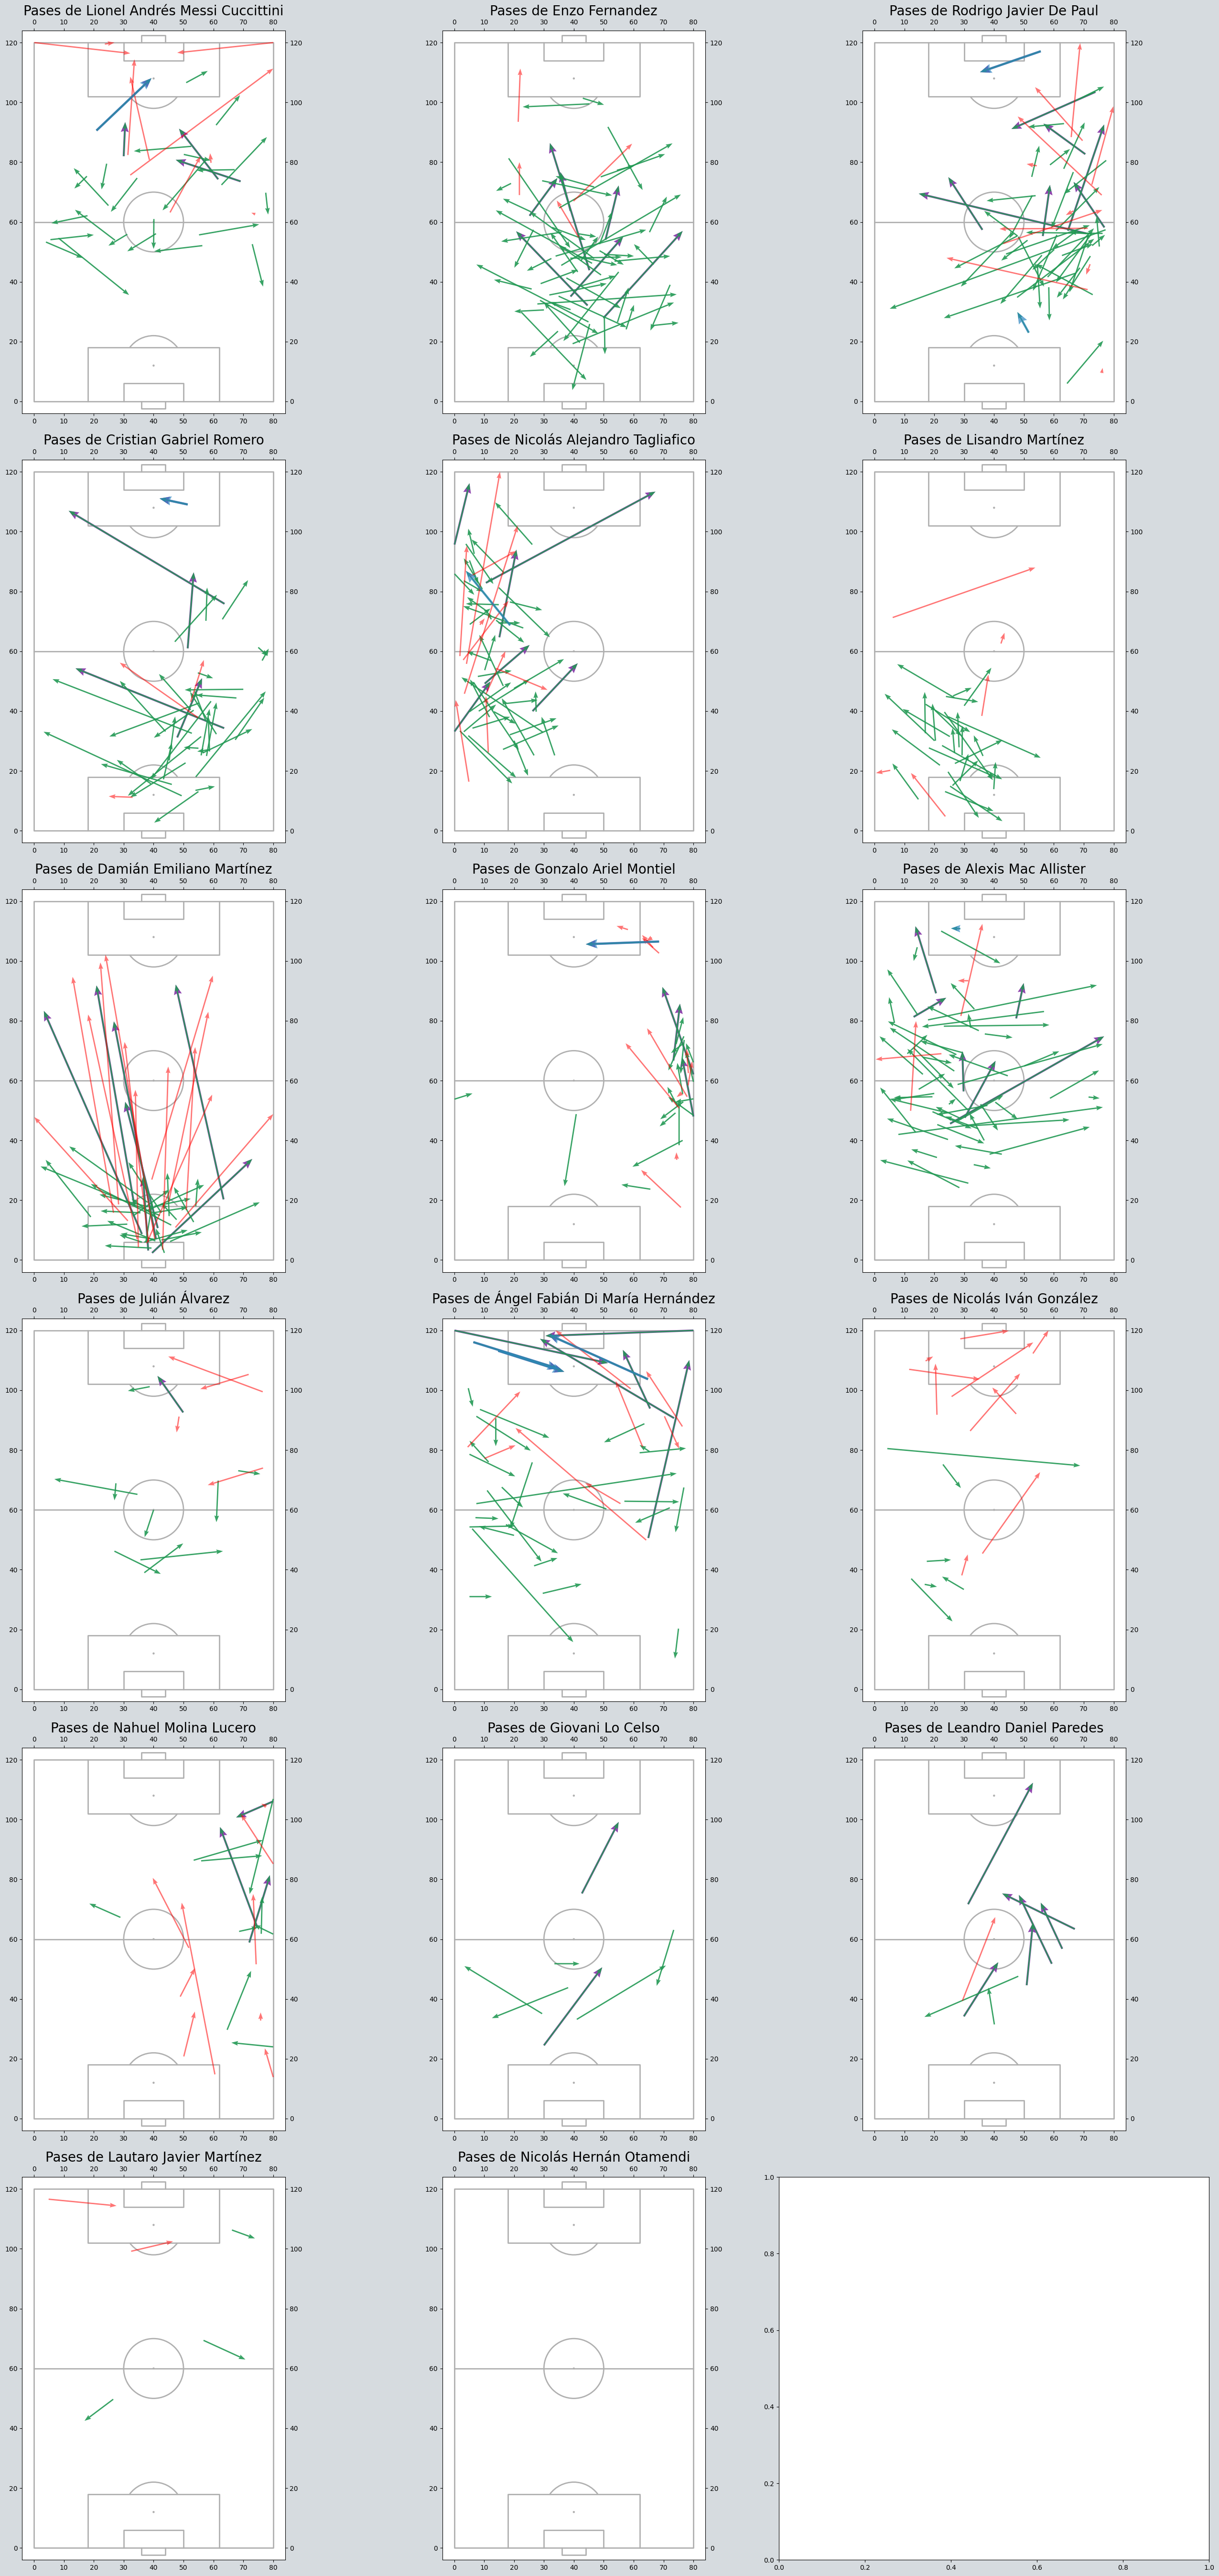

In [23]:
# Número de jugadores y dimensiones de la cuadrícula
jugadores = partido[partido['team'] == 'Argentina']['player'].dropna().unique()
num_jugadores = len(jugadores)

# Determinar las dimensiones de la cuadrícula
rows = int(np.ceil(num_jugadores / 3))  # Aproximadamente 3 gráficos por fila
cols = min(num_jugadores, 3)

# Crear la figura con subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*9, rows*9))
fig.set_facecolor('#d6dbdf')

# Si hay una sola fila o columna, axs necesita ser tratado como una lista.
axs = axs.flatten() if num_jugadores > 1 else [axs]

# Iterar sobre los jugadores y crear un gráfico para cada uno
for i, jugador in enumerate(jugadores):
    # Filtrar los eventos de pase para el jugador específico
    jugador_df = partido[partido['player'] == jugador]
    pasesenzo = jugador_df[jugador_df['type'] == 'Pass']
    
    pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
    pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
    pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]

    # Calculo de pases progresivos
    pases_correctos = pases_correctos.reset_index(drop=True)
    pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))
    pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))
    pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
    progresivos = pases_correctos[pases_correctos['progressive'] == True]

    # Crear el campo de juego para este subplot
    ax = axs[i]
    pitch = VerticalPitch(pitch_type='statsbomb', axis=True, label=True, tick=True, goal_type='box')
    pitch.draw(ax=ax)

    # Dibujar los diferentes tipos de pases
    pitch.arrows(progresivos['x'], progresivos['y'], progresivos['endx'], progresivos['endy'], width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
    pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
    pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax)
    pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax)

    # Título con el nombre del jugador
    ax.set_title(f'Pases de {jugador}', fontsize=20)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Guardar la figura en un solo archivo PNG
plt.savefig('mapa_pases_equipo.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()

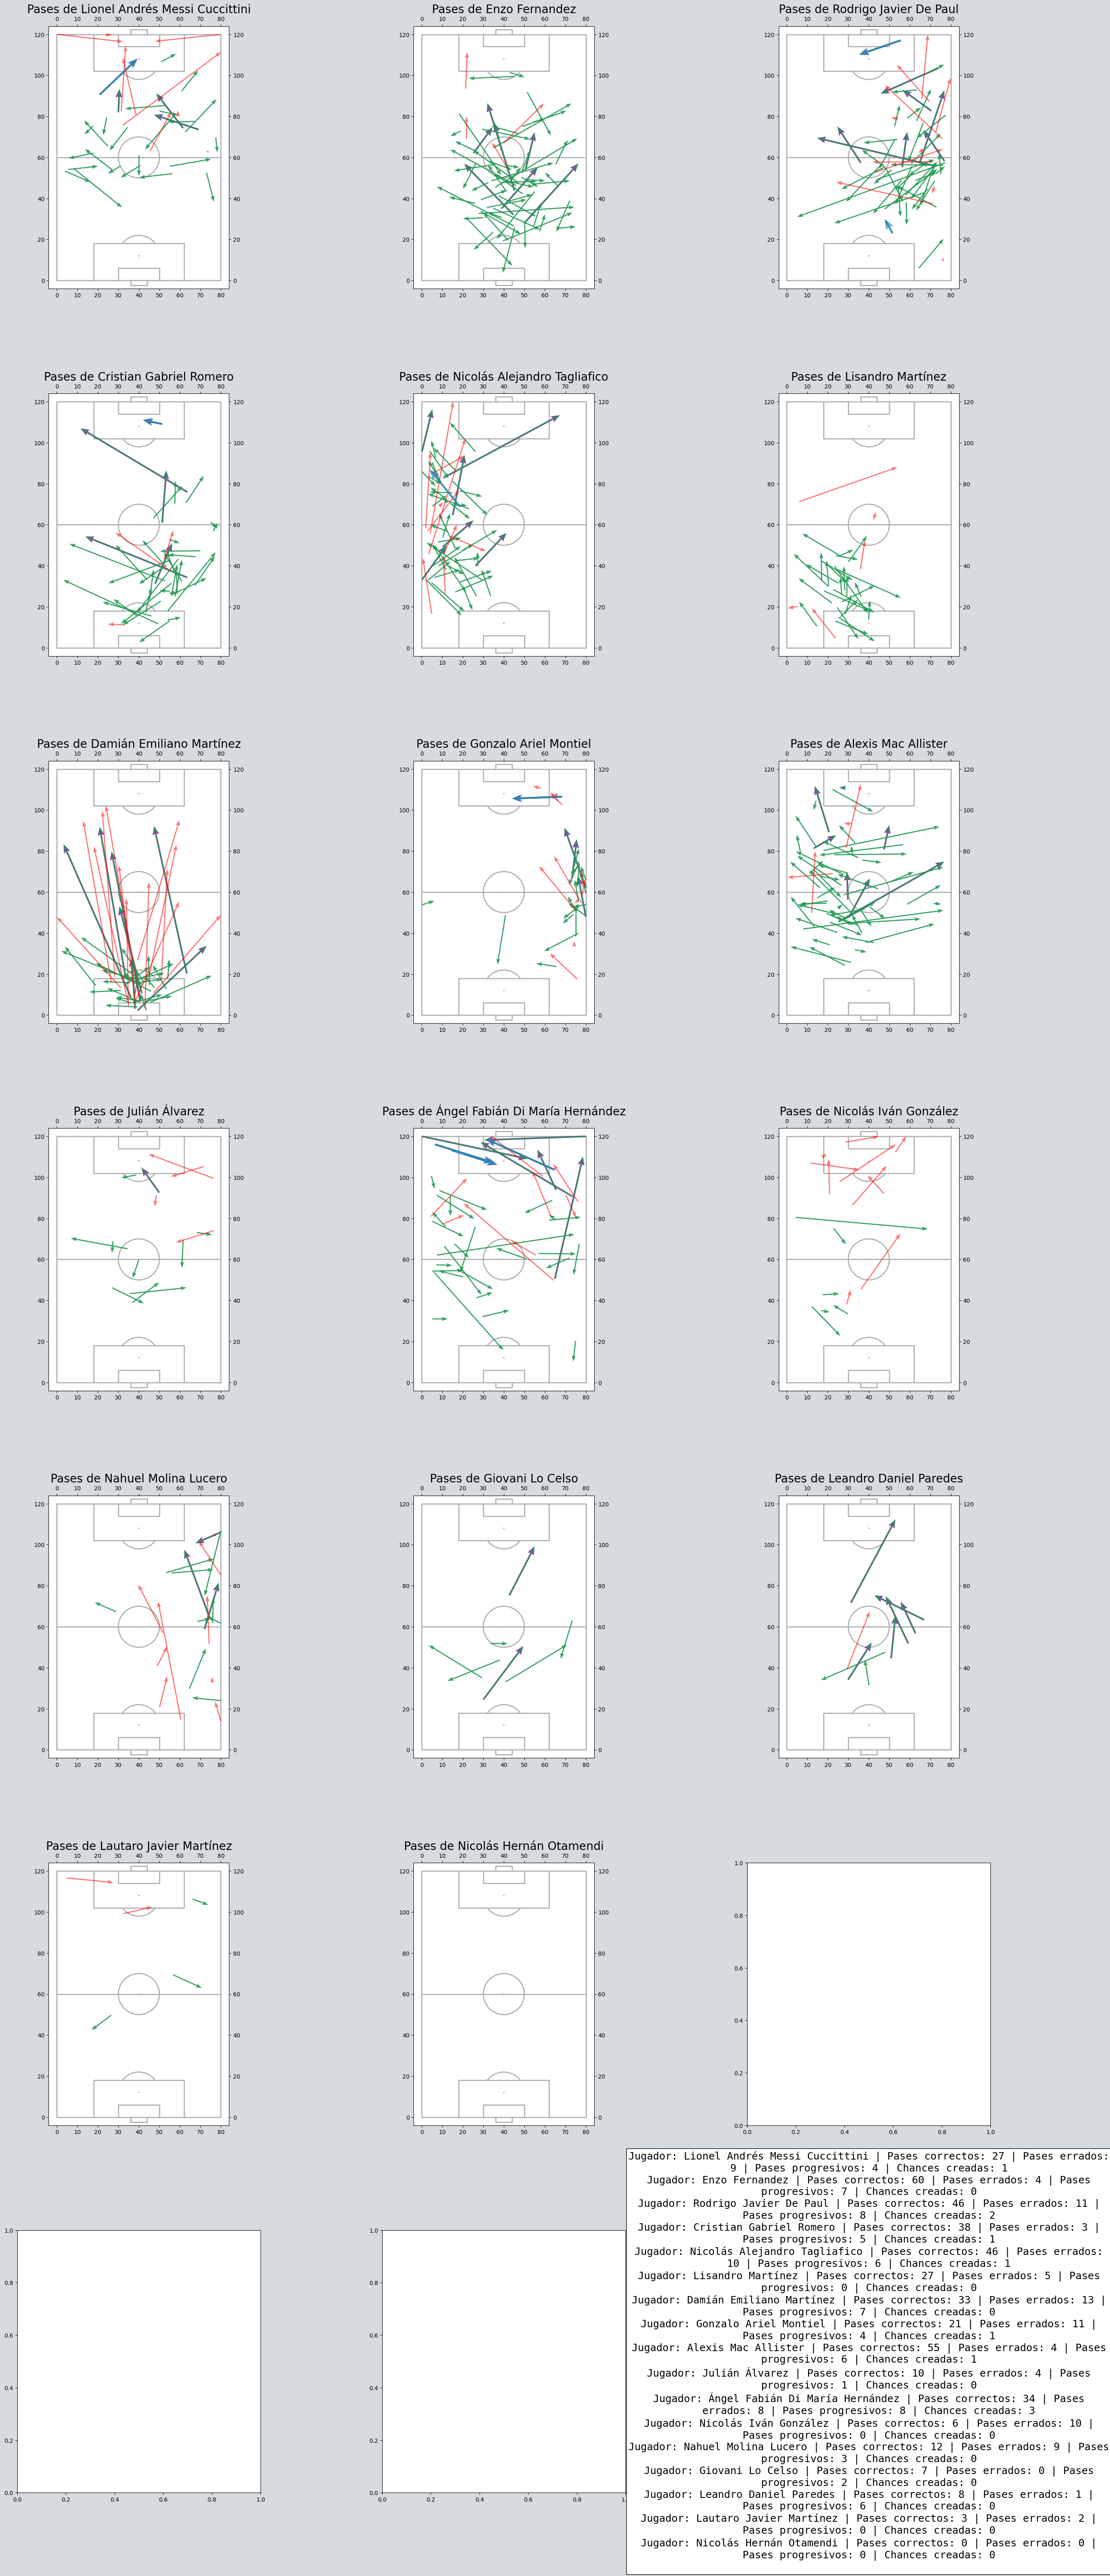

In [25]:
jugadores = partido[partido['team'] == 'Argentina']['player'].dropna().unique()

# Número de jugadores y dimensiones de la cuadrícula
num_jugadores = len(jugadores)

# Determinar las dimensiones de la cuadrícula
rows = int(np.ceil(num_jugadores / 3))  # Aproximadamente 3 gráficos por fila
cols = min(num_jugadores, 3)

# Crear la figura con subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*9, rows*9))
fig.set_facecolor('#d6dbdf')

# Si hay una sola fila o columna, axs necesita ser tratado como una lista.
axs = axs.flatten() if num_jugadores > 1 else [axs]

# Lista para guardar las estadísticas de cada jugador
estadisticas_jugadores = []

# Iterar sobre los jugadores y crear un gráfico para cada uno
for i, jugador in enumerate(jugadores):
    # Filtrar los eventos de pase para el jugador específico
    jugador_df = partido[partido['player'] == jugador]
    pasesenzo = jugador_df[jugador_df['type'] == 'Pass']
    
    pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
    pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
    pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]

    # Calculo de pases progresivos
    pases_correctos = pases_correctos.reset_index(drop=True)
    pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))
    pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))
    pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
    progresivos = pases_correctos[pases_correctos['progressive'] == True]

    # Guardar estadísticas del jugador
    estadisticas_jugadores.append({
        'jugador': jugador,
        'pases_correctos': len(pases_correctos),
        'pases_errados': len(pases_errados),
        'pases_progresivos': len(progresivos),
        'pases_clave': len(pases_clave)
    })

    # Crear el campo de juego para este subplot
    ax = axs[i]
    pitch = VerticalPitch(pitch_type='statsbomb', axis=True, label=True, tick=True, goal_type='box')
    pitch.draw(ax=ax)

    # Dibujar los diferentes tipos de pases
    pitch.arrows(progresivos['x'], progresivos['y'], progresivos['endx'], progresivos['endy'], width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
    pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
    pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax)
    pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax)

    # Título con el nombre del jugador
    ax.set_title(f'Pases de {jugador}', fontsize=20)

# Verificar si hay espacio vacío en la última posición
if len(jugadores) < len(axs):
    # Tomar el último ax vacío
    ax = axs[-1]
    ax.axis('off')  # Desactivar el plot
    
    # Crear un texto para mostrar las estadísticas
    stats_text = ""
    for stats in estadisticas_jugadores:
        stats_text += f"Jugador: {stats['jugador']}\n"
        stats_text += f"Pases correctos: {stats['pases_correctos']}\n"
        stats_text += f"Pases errados: {stats['pases_errados']}\n"
        stats_text += f"Pases progresivos: {stats['pases_progresivos']}\n"
        stats_text += f"Chances creadas: {stats['pases_clave']}\n\n"

    # Mostrar el texto en el subplot vacío
    ax.text(0.5, 0.5, stats_text, fontsize=18, va='center', ha='center', wrap=True, family='monospace')

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Guardar la figura en un solo archivo PNG
plt.savefig('mapa_pases_equipo.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()


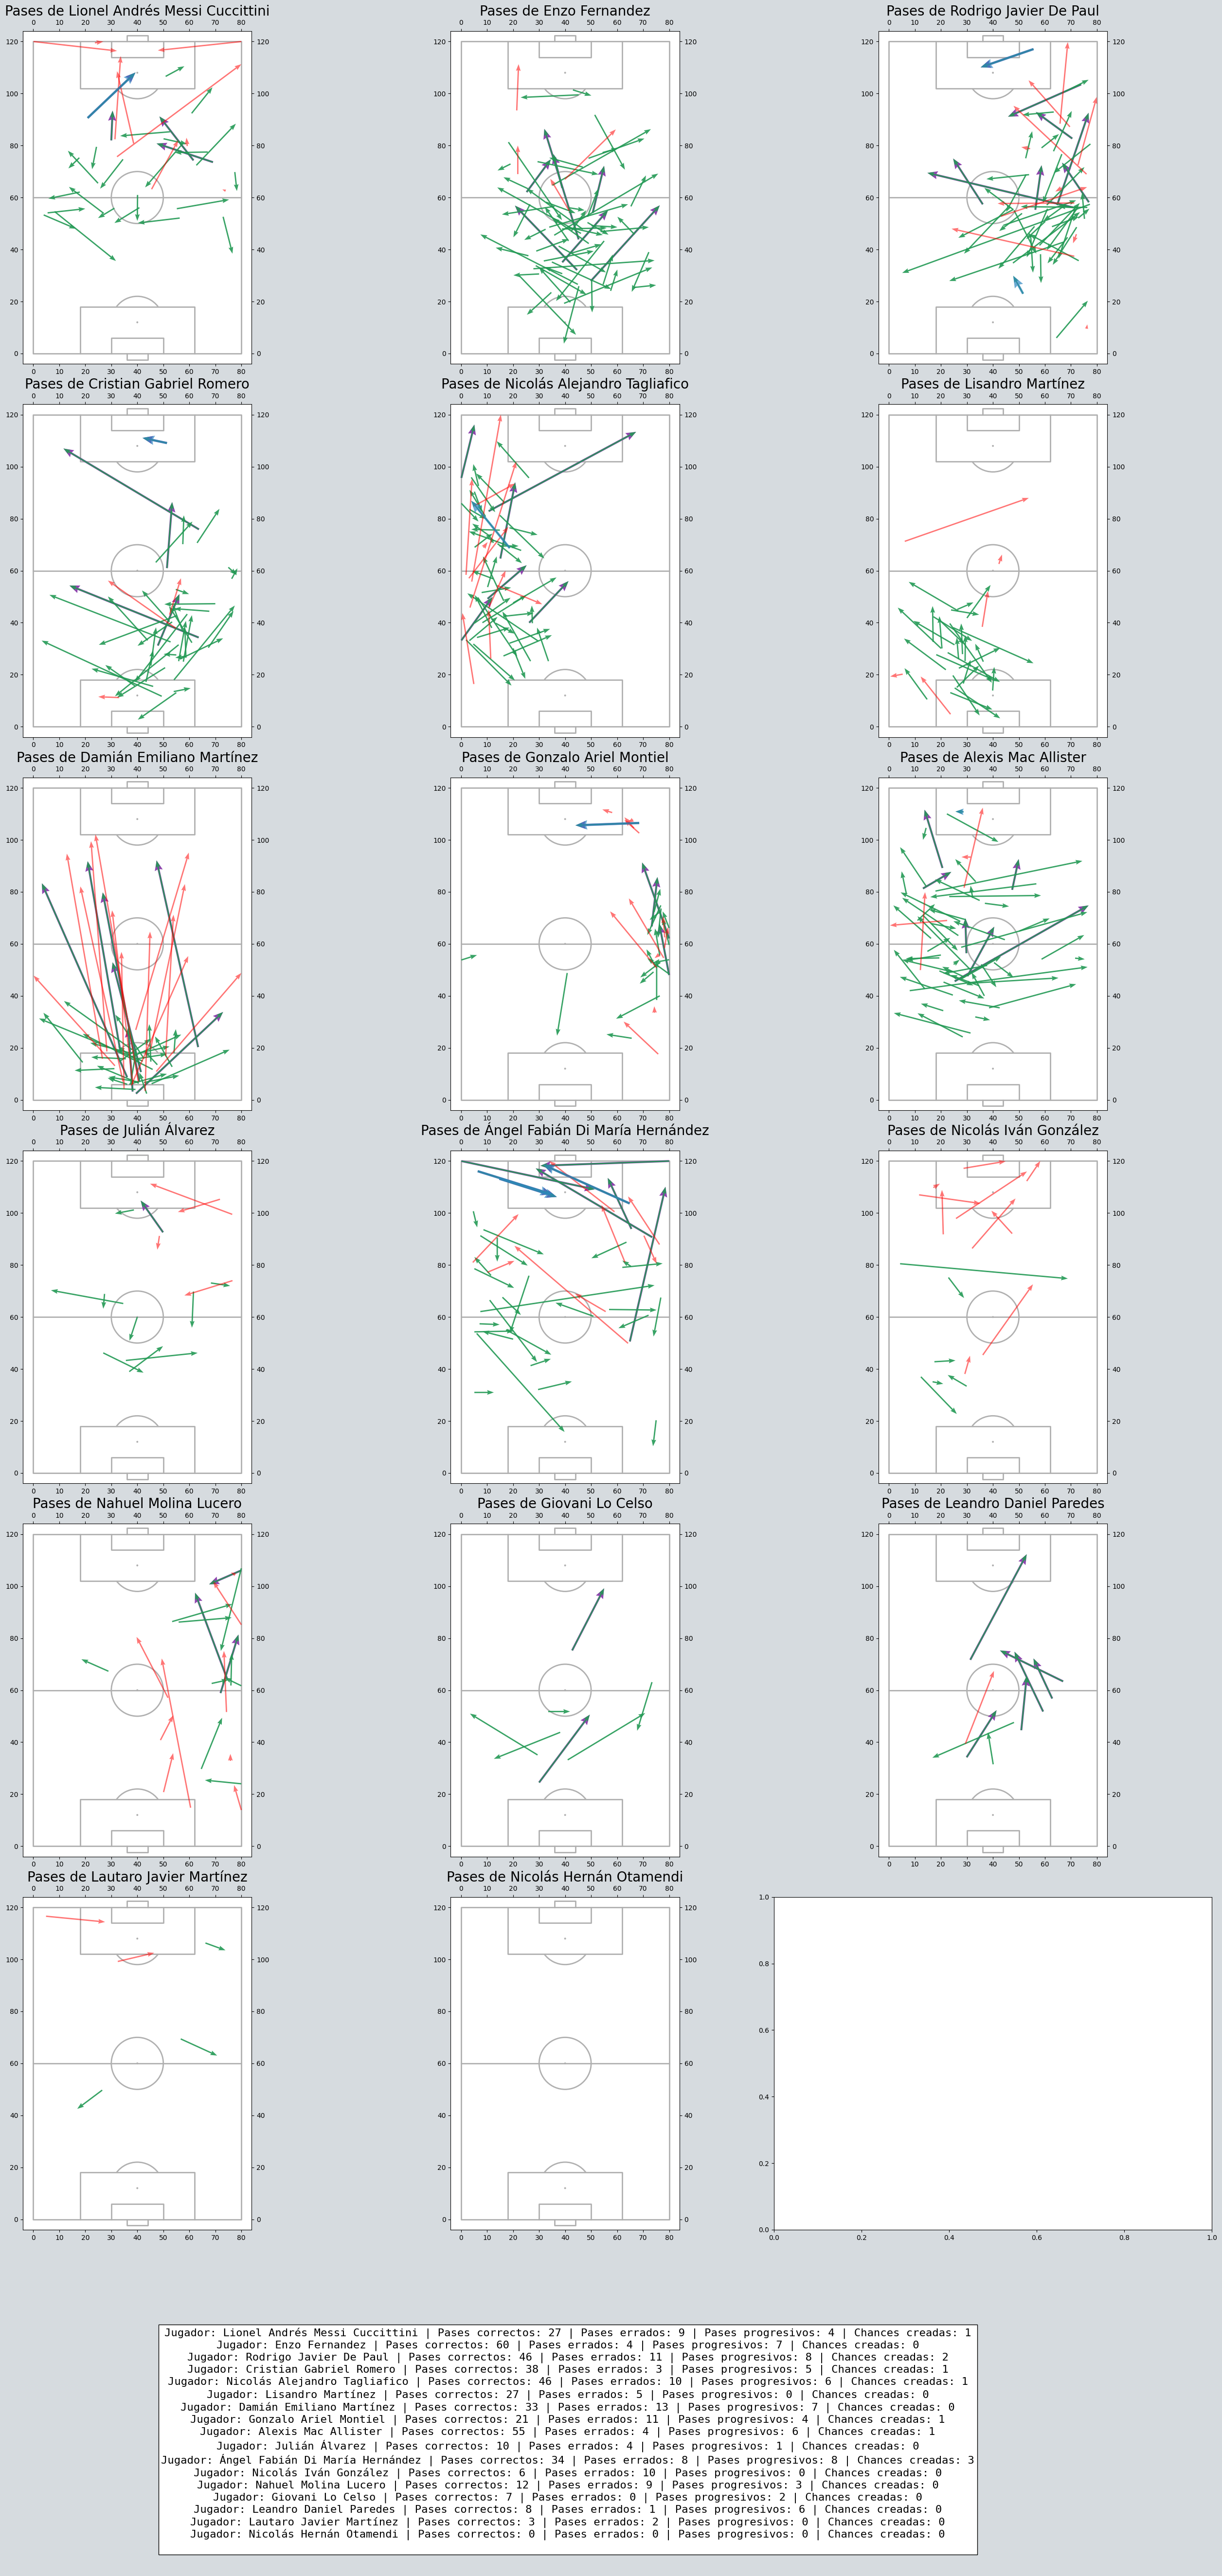

In [29]:
jugadores = partido[partido['team'] == 'Argentina']['player'].dropna().unique()
num_jugadores = len(jugadores)

# Determinar las dimensiones de la cuadrícula
rows = int(np.ceil(num_jugadores / 3))  # Aproximadamente 3 gráficos por fila
cols = min(num_jugadores, 3)

# Crear la figura con subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*9, rows*9))
fig.set_facecolor('#d6dbdf')

# Si hay una sola fila o columna, axs necesita ser tratado como una lista.
axs = axs.flatten() if num_jugadores > 1 else [axs]

# Lista para guardar las estadísticas de cada jugador
estadisticas_jugadores = []

# Iterar sobre los jugadores y crear un gráfico para cada uno
for i, jugador in enumerate(jugadores):
    # Filtrar los eventos de pase para el jugador específico
    jugador_df = partido[partido['player'] == jugador]
    pasesenzo = jugador_df[jugador_df['type'] == 'Pass']
    
    pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
    pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
    pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]

    # Calculo de pases progresivos
    pases_correctos = pases_correctos.reset_index(drop=True)
    pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))
    pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))
    pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
    progresivos = pases_correctos[pases_correctos['progressive'] == True]

    # Guardar estadísticas del jugador
    estadisticas_jugadores.append({
        'jugador': jugador,
        'pases_correctos': len(pases_correctos),
        'pases_errados': len(pases_errados),
        'pases_progresivos': len(progresivos),
        'pases_clave': len(pases_clave)
    })

    # Crear el campo de juego para este subplot
    ax = axs[i]
    pitch = VerticalPitch(pitch_type='statsbomb', axis=True, label=True, tick=True, goal_type='box')
    pitch.draw(ax=ax)

    # Dibujar los diferentes tipos de pases
    pitch.arrows(progresivos['x'], progresivos['y'], progresivos['endx'], progresivos['endy'], width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
    pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
    pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax)
    pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax)

    # Título con el nombre del jugador
    ax.set_title(f'Pases de {jugador}', fontsize=20)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Crear un subplot separado para las estadísticas de los jugadores
fig.subplots_adjust(bottom=0.15)  # Dejar espacio en la parte inferior para las endnotes
ax_endnote = fig.add_axes([0.1, 0.02, 0.8, 0.1])  # Eje para las endnotes
ax_endnote.axis('off')  # Ocultar los ejes de las endnotes

# Crear el texto de las estadísticas
stats_text = ""
for stats in estadisticas_jugadores:
    stats_text += f"Jugador: {stats['jugador']} | "
    stats_text += f"Pases correctos: {stats['pases_correctos']} | "
    stats_text += f"Pases errados: {stats['pases_errados']} | "
    stats_text += f"Pases progresivos: {stats['pases_progresivos']} | "
    stats_text += f"Chances creadas: {stats['pases_clave']}\n"

# Añadir el texto centrado en el área de endnote
ax_endnote.text(0.5, 0.5, stats_text, fontsize=16, va='center', ha='center', wrap=True, family='monospace', bbox=dict(facecolor='white', edgecolor='black'))

# Guardar la figura en un solo archivo PNG
plt.savefig('mapa_pases_equipo_con_estadisticas.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()

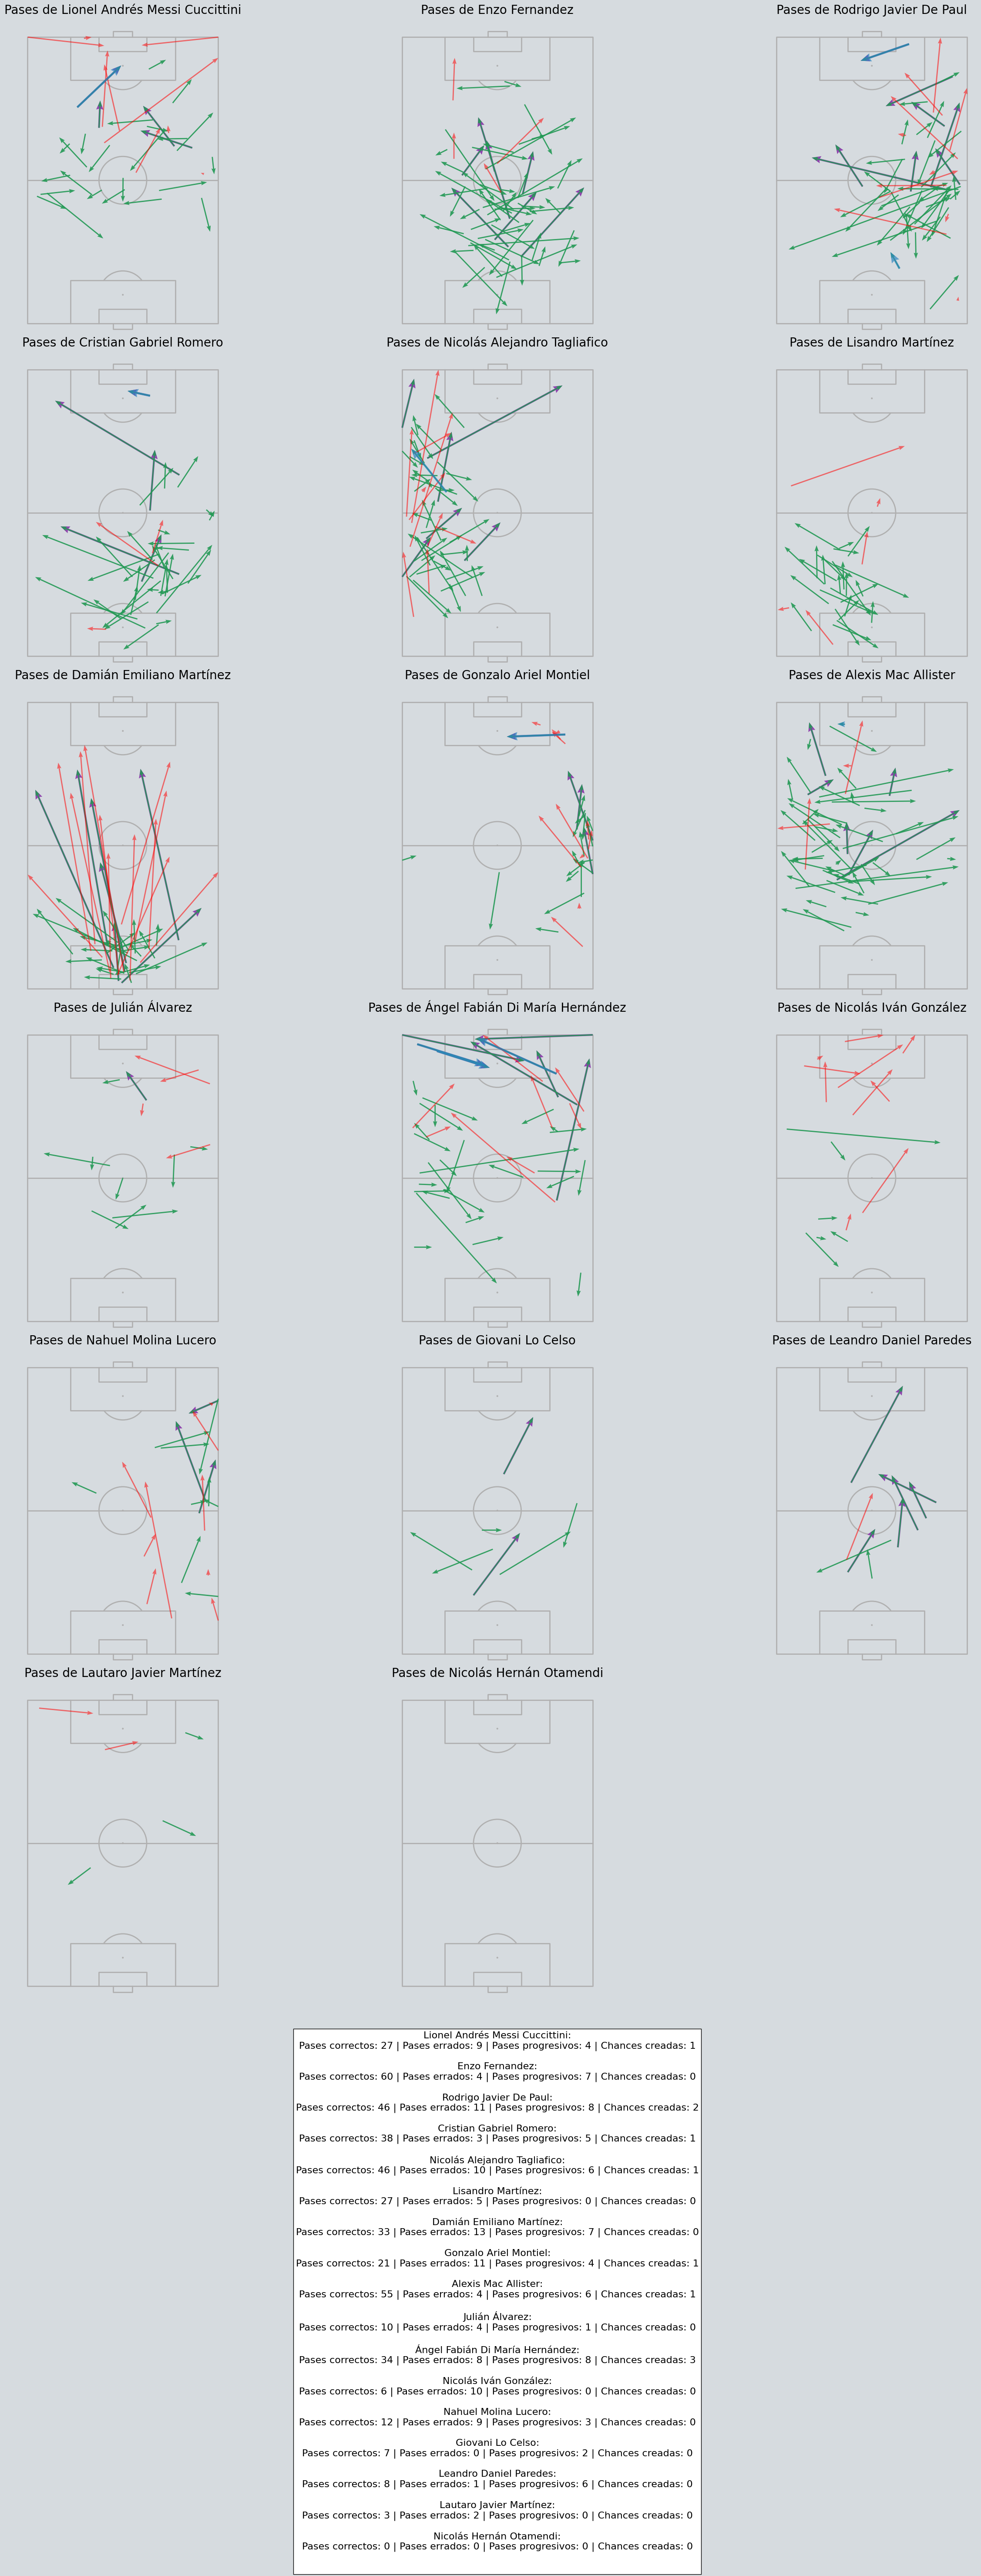

In [47]:

jugadores = partido[partido['team'] == 'Argentina']['player'].dropna().unique()
num_jugadores = len(jugadores)

# Determinar las dimensiones de la cuadrícula
cols = 3  # Fijamos las columnas a 3
rows = int(np.ceil(num_jugadores / cols))  # Determinamos las filas necesarias

# Lista para guardar las estadísticas de cada jugador
estadisticas_jugadores = []

# Crear la figura con subplots
fig, axs = plt.subplots(rows, cols, figsize=(cols*9, rows*9))
fig.set_facecolor('#d6dbdf')


# Si hay una sola fila o columna, axs necesita ser tratado como una lista.
axs = axs.flatten() if num_jugadores > 1 else [axs]



# Iterar sobre los jugadores y crear un gráfico para cada uno
for i, jugador in enumerate(jugadores):
    # Filtrar los eventos de pase para el jugador específico
    jugador_df = partido[partido['player'] == jugador]
    pasesenzo = jugador_df[jugador_df['type'] == 'Pass']
    
    pases_correctos = pasesenzo[pasesenzo.pass_outcome.isna() == True]
    pases_errados = pasesenzo[pasesenzo.pass_outcome.isna() != True]
    pases_clave = pasesenzo[pasesenzo.pass_shot_assist.isna() != True]

    # Calculo de pases progresivos
    pases_correctos = pases_correctos.reset_index(drop=True)
    pases_correctos['beginning'] = np.sqrt(np.square(120-pases_correctos['x']) + np.square(40-pases_correctos['y']))
    pases_correctos['end'] = np.sqrt(np.square(120-pases_correctos['endx']) + np.square(40-pases_correctos['endy']))
    pases_correctos['progressive'] = [(pases_correctos['end'][x]) / (pases_correctos['beginning'][x]) < .8 for x in range(len(pases_correctos.beginning))]
    progresivos = pases_correctos[pases_correctos['progressive'] == True]

    # Guardar estadísticas del jugador
    estadisticas_jugadores.append({
        'jugador': jugador,
        'pases_correctos': len(pases_correctos),
        'pases_errados': len(pases_errados),
        'pases_progresivos': len(progresivos),
        'pases_clave': len(pases_clave)
    })

    # Crear la cancha para este subplot
    ax = axs[i]
    ax.axis('off') # Se le sacan los ejes a la cancha
    pitch = VerticalPitch(pitch_type='statsbomb', axis=True, label=True, tick=True, goal_type='box')
    pitch.draw(ax=ax)

    # Dibujar los diferentes tipos de pases
    pitch.arrows(progresivos['x'], progresivos['y'], progresivos['endx'], progresivos['endy'], width=3, headwidth=4, label='Pases progresivos', color='#8e44ad', ax=ax, alpha=.99)
    pitch.arrows(pases_correctos['x'], pases_correctos['y'], pases_correctos['endx'], pases_correctos['endy'], width=2, headwidth=3.5, label='Pases intentados', alpha=.9, color='#229954', ax=ax)
    pitch.arrows(pases_errados['x'], pases_errados['y'], pases_errados['endx'], pases_errados['endy'], width=2, headwidth=3.5, alpha=.54, color='red', ax=ax)
    pitch.arrows(pases_clave['x'], pases_clave['y'], pases_clave['endx'], pases_clave['endy'], width=3.5, headwidth=4, alpha=.7, color='#2e86c1', ax=ax)

    # Título con el nombre del jugador
    ax.set_title(f'Pases de {jugador}', fontsize=20)

# Si el número de jugadores no llena completamente la cuadrícula, ocultar los subplots vacíos
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Crear un subplot separado para las estadísticas de los jugadores
fig.subplots_adjust(bottom=0.15)  # Dejar espacio en la parte inferior para las endnotes
ax_endnote = fig.add_axes([0.1, 0.02, 0.8, 0.1])  # Eje para las endnotes
ax_endnote.axis('off')  # Ocultar los ejes de las endnotes

# Crear el texto de las estadísticas
stats_text = ""
for stats in estadisticas_jugadores:
    # Nombre del jugador con la fuente de título y tamaño mayor
    stats_text += f"{stats['jugador']}:\n"
    stats_text += f"Pases correctos: {stats['pases_correctos']} | "
    stats_text += f"Pases errados: {stats['pases_errados']} | "
    stats_text += f"Pases progresivos: {stats['pases_progresivos']} | "
    stats_text += f"Chances creadas: {stats['pases_clave']}"
    stats_text += "\n"  # Espacio entre estadísticas de diferentes jugadores
    stats_text += "\n"


ax_endnote.text(0.5, 0, stats_text, fontsize=16, va='center', ha='center', wrap=True, bbox=dict(facecolor='white', edgecolor='black'))


# Guardar la figura en un solo archivo PNG
plt.savefig('mapa_pases_equipo.png', dpi=300, bbox_inches='tight')

# Mostrar la figura
plt.show()